In [ ]:
import os
import string
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

csv_path = '/content/drive/MyDrive/Colab Notebooks/data-spotify'


In [ ]:
music_data = pd.read_csv(os.path.join(csv_path, '/content/drive/MyDrive/Colab Notebooks/data-spotify/spotify-streaming-top-50-argentina.csv')).head()


In [ ]:
file_names = [f for f in os.listdir(csv_path) if f.endswith('.csv')]
file_names

['spotify-streaming-top-50-argentina.csv',
 'spotify-streaming-top-50-italy.csv',
 'spotify-streaming-top-50-japan.csv',
 'spotify-streaming-top-50-mexico.csv',
 'spotify-streaming-top-50-spain.csv',
 'spotify-streaming-top-50-france.csv',
 'spotify-streaming-top-50-south-korea.csv',
 'spotify-streaming-top-50-uk.csv',
 'spotify-streaming-top-50-usa.csv',
 'spotify-streaming-top-50-world.csv']

In [ ]:
key_names = [key_name
    .replace('spotify-streaming-top-50-','')
    .replace('italy', 'Italy')
    .replace('argentina', 'Argentina')
    .replace('mexico', 'México')
    .replace('japan', 'Japan')
    .replace('france', 'France')
    .replace('south-korea', 'South Korea')
    .replace('.csv','')
    for key_name in file_names]
key_names

['Argentina',
 'Italy',
 'Japan',
 'México',
 'spain',
 'France',
 'South Korea',
 'uk',
 'usa',
 'world']

In [ ]:
data = {}
for k,f in zip(key_names, file_names):
    data[k] = pd.read_csv(os.path.join(csv_path, f),  nrows=1500000)

data

{'Argentina':             date  position                     song  \
 0     2023-05-18         1  Un Finde | CROSSOVER #2   
 1     2023-05-18         2          La Bebe - Remix   
 2     2023-05-18         3              M.A - Remix   
 3     2023-05-18         4               Classy 101   
 4     2023-05-18         5                un x100to   
 ...          ...       ...                      ...   
 2695  2023-07-10        46                   Normal   
 2696  2023-07-10        47                 Columbia   
 2697  2023-07-10        48                 El Cielo   
 2698  2023-07-10        49            Ni Una Ni Dos   
 2699  2023-07-10        50     qué le pasa conmigo?   
 
                                   artist  popularity  duration_ms album_type  \
 0          Big One & FMK & Ke Personajes          89       162500     single   
 1                 Yng Lvcas & Peso Pluma          99       234352     single   
 2        BM & Callejero Fino & La Joaqui          85       272727    

# Concat data

In [ ]:
data['Italy']['Country'] = "Italy"
data['México']['Country'] = "México"
data['Argentina']['Country']= "Argentina"
data['Japan']['Country'] = "Japan"
data['France']['Country'] = "France"
data['South Korea']['Country']= "South Korea"

In [ ]:
top50_music = pd.concat([data['Italy'], data['Argentina'], data['México'], data['Japan'], data['France'], data['South Korea']], ignore_index=True)

In [ ]:
top50_music

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url,Country
0,2023-05-18,1,"Gelosa (feat. Shiva, Sfera Ebbasta, Guè)",Finesse & Shiva & Sfera Ebbasta,82,181611,single,1,2023-02-24,False,https://i.scdn.co/image/ab67616d0000b273daa862...,Italy
1,2023-05-18,2,CENERE,Lazza,77,208323,album,26,2022-04-07,False,https://i.scdn.co/image/ab67616d0000b273279a77...,Italy
2,2023-05-18,3,IL MALE CHE MI FAI (feat. Marracash),Geolier,81,167339,album,24,2023-04-07,False,https://i.scdn.co/image/ab67616d0000b273afd999...,Italy
3,2023-05-18,4,Pelé,Rhove & Madfingerz,78,133858,single,1,2023-03-16,True,https://i.scdn.co/image/ab67616d0000b273195905...,Italy
4,2023-05-18,5,Un Briciolo Di Allegria (con MINA),BLANCO,79,207615,album,12,2023-04-13,False,https://i.scdn.co/image/ab67616d0000b273d0a7df...,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
16195,2023-07-10,46,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,89,157560,album,17,2019-09-06,False,https://i.scdn.co/image/ab67616d0000b2739478c8...,South Korea
16196,2023-07-10,47,Promise,Jimin,77,151011,single,1,2018-12-31,False,https://i.scdn.co/image/ab67616d0000b27321d21c...,South Korea
16197,2023-07-10,48,Monet,Beenzino,52,158520,album,18,2023-07-03,True,https://i.scdn.co/image/ab67616d0000b273ec4d37...,South Korea
16198,2023-07-10,49,VIBE (feat. Jimin of BTS),TAEYANG,72,175775,album,6,2023-04-25,False,https://i.scdn.co/image/ab67616d0000b273463132...,South Korea


# Month to datetime

In [ ]:
top50_music['date'] = pd.to_datetime(top50_music['date'], format='%Y-%m-%d')
top50_music.head(3)

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url,Country
0,2023-05-18,1,"Gelosa (feat. Shiva, Sfera Ebbasta, Guè)",Finesse & Shiva & Sfera Ebbasta,82,181611,single,1,2023-02-24,False,https://i.scdn.co/image/ab67616d0000b273daa862...,Italy
1,2023-05-18,2,CENERE,Lazza,77,208323,album,26,2022-04-07,False,https://i.scdn.co/image/ab67616d0000b273279a77...,Italy
2,2023-05-18,3,IL MALE CHE MI FAI (feat. Marracash),Geolier,81,167339,album,24,2023-04-07,False,https://i.scdn.co/image/ab67616d0000b273afd999...,Italy


In [ ]:
display(top50_music['date'].dt.year.head())
top50_music['date'].dt.month.tail()

0    2023
1    2023
2    2023
3    2023
4    2023
Name: date, dtype: int64

16195    7
16196    7
16197    7
16198    7
16199    7
Name: date, dtype: int64

In [ ]:
top50_music['release_date'] = pd.to_datetime(top50_music['release_date'], format='%Y-%m-%d')
top50_music.head(3)

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url,Country
0,2023-05-18,1,"Gelosa (feat. Shiva, Sfera Ebbasta, Guè)",Finesse & Shiva & Sfera Ebbasta,82,181611,single,1,2023-02-24,False,https://i.scdn.co/image/ab67616d0000b273daa862...,Italy
1,2023-05-18,2,CENERE,Lazza,77,208323,album,26,2022-04-07,False,https://i.scdn.co/image/ab67616d0000b273279a77...,Italy
2,2023-05-18,3,IL MALE CHE MI FAI (feat. Marracash),Geolier,81,167339,album,24,2023-04-07,False,https://i.scdn.co/image/ab67616d0000b273afd999...,Italy


In [ ]:
display(top50_music['release_date'].dt.year.head())
top50_music['release_date'].dt.month.tail()

0    2023
1    2022
2    2023
3    2023
4    2023
Name: release_date, dtype: int64

16195     9
16196    12
16197     7
16198     4
16199     8
Name: release_date, dtype: int64

In [ ]:
top50_music['days_since_release'] = top50_music['date'] - top50_music['release_date']

In [ ]:
# Group the DataFrame by 'position' and calculate the average days since release for each position
average_days_since_release = top50_music.groupby('position')['days_since_release'].mean()

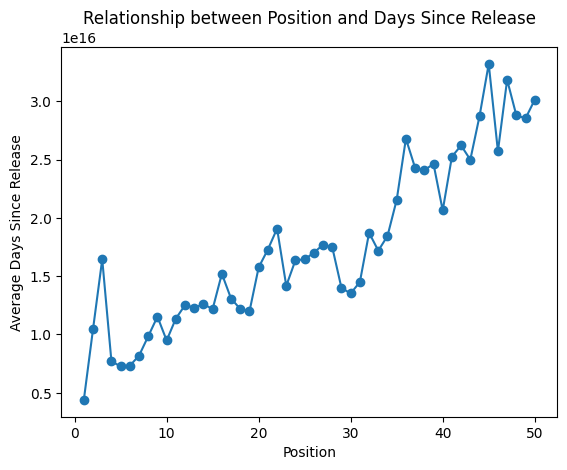

In [ ]:
import matplotlib.pyplot as plt
# Plot the relationship between position and average days since release
average_days_since_release.plot(x='position', y='days_since_release', kind='line', marker='o')
plt.xlabel('Position')
plt.ylabel('Average Days Since Release')
plt.title('Relationship between Position and Days Since Release')
plt.show()

# Yearly music reproduction

In [ ]:
top50_music['date'] = pd.to_datetime(top50_music['date'], format='%Y-%m').dt.year
top50_music['date']

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
16195    2023
16196    2023
16197    2023
16198    2023
16199    2023
Name: date, Length: 16200, dtype: int64

# Top50 per Country

In [ ]:
top50_music.filter(items=["position", "Country", "song"])

,position,Country,song
0,1,Italy,"Gelosa (feat. Shiva, Sfera Ebbasta, Guè)"
1,2,Italy,CENERE
2,3,Italy,IL MALE CHE MI FAI (feat. Marracash)
3,4,Italy,Pelé
4,5,Italy,Un Briciolo Di Allegria (con MINA)
...,...,...,...
16195,46,South Korea,Sunflower - Spider-Man: Into the Spider-Verse
16196,47,South Korea,Promise
16197,48,South Korea,Monet
16198,49,South Korea,VIBE (feat. Jimin of BTS)


In [ ]:
# Define a function to get the top 3 songs for each country based on positions
def get_top_songs(group):
    return group[group['position'] <= 10]


In [ ]:
# Group the DataFrame by 'Country' column and apply the function to get the top 3 songs for each country
top_songs_per_country = top50_music.groupby('Country').apply(get_top_songs).reset_index(drop=True)

# Select the distinct songs for each country
top_songs_per_country = top_songs_per_country.drop_duplicates(subset=['Country', 'song'])

# Filter the columns to include only 'position', 'Country', and 'song'
top_songs_per_country = top_songs_per_country.filter(items=['position', 'Country', 'song', 'artist', 'popularity','duration_ms', 'is_explicit'])
top_songs_per_country

,position,Country,song,artist,popularity,duration_ms,is_explicit
0,1,Argentina,Un Finde | CROSSOVER #2,Big One & FMK & Ke Personajes,89,162500,False
1,2,Argentina,La Bebe - Remix,Yng Lvcas & Peso Pluma,99,234352,True
2,3,Argentina,M.A - Remix,BM & Callejero Fino & La Joaqui,85,272727,True
3,4,Argentina,Classy 101,Feid & Young Miko,95,195986,True
4,5,Argentina,un x100to,Grupo Frontera & Bad Bunny,99,194563,False
...,...,...,...,...,...,...,...
3004,5,South Korea,"Angel Pt. 2 (feat. Jimin of BTS, Charlie Puth ...",Fast & Furious: The Fast Saga & Jimin & BTS,55,176454,False
3157,8,South Korea,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,87,154486,False
3187,8,South Korea,Still With You,Jung Kook,78,239905,False
3223,4,South Korea,Super Shy,NewJeans,0,154666,False


In [ ]:
top_songs_selected = top_songs_per_country[["song","artist", "Country"]]

In [ ]:
top_songs_selected

,song,artist,Country
0,Un Finde | CROSSOVER #2,Big One & FMK & Ke Personajes,Argentina
1,La Bebe - Remix,Yng Lvcas & Peso Pluma,Argentina
2,M.A - Remix,BM & Callejero Fino & La Joaqui,Argentina
3,Classy 101,Feid & Young Miko,Argentina
4,un x100to,Grupo Frontera & Bad Bunny,Argentina
...,...,...,...
3004,"Angel Pt. 2 (feat. Jimin of BTS, Charlie Puth ...",Fast & Furious: The Fast Saga & Jimin & BTS,South Korea
3157,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,South Korea
3187,Still With You,Jung Kook,South Korea
3223,Super Shy,NewJeans,South Korea


# Understanding tendencies

In [ ]:
explicit_per_country = top50_music.groupby('Country')['is_explicit'].sum("True")
explicit_per_country

Country
Argentina      1038
France         1694
Italy           852
Japan             0
México         1388
South Korea     206
Name: is_explicit, dtype: int64

Top artists in Italy:
artist
Tedua                        348
Geolier                      218
Shiva                        145
Emis Killa                   116
Drillionaire                  85
Pinguini Tattici Nucleari     84
Baby Gang                     83
Marco Mengoni                 83
Annalisa                      68
Lazza                         65
Name: artist, dtype: int64



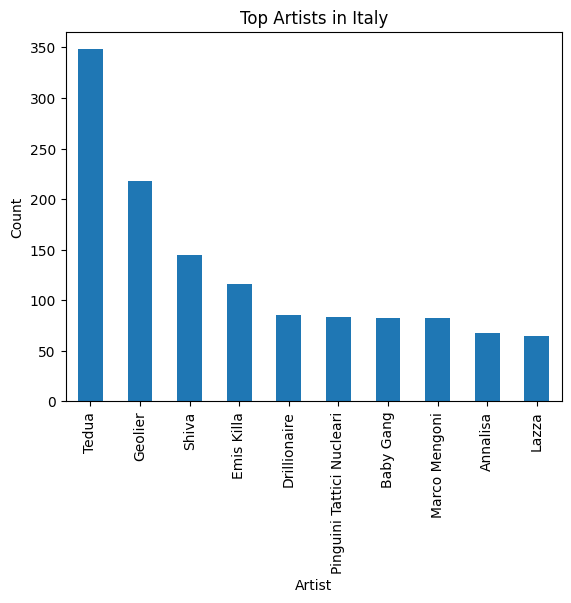

Top artists in Argentina:
artist
Nicki Nicole                       157
Feid                               104
Ke Personajes                      102
TINI                               100
Duki                                93
Maria Becerra                       70
Milo j                              67
Miranda!                            57
BM & Callejero Fino & La Joaqui     54
BM & Phontana                       54
Name: artist, dtype: int64



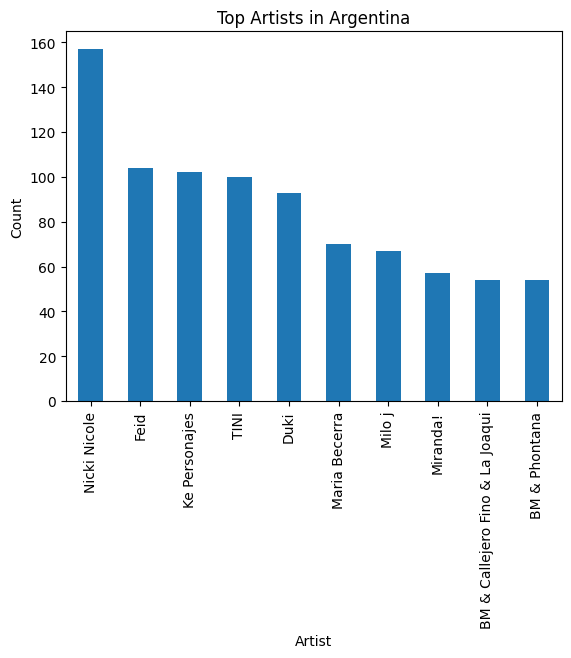

Top artists in México:
artist
Peso Pluma                     258
Fuerza Regida                  227
Natanael Cano                  113
Bad Bunny                      112
Eslabon Armado                 108
Junior H                        88
KAROL G                         72
Carin Leon                      59
Becky G & Peso Pluma            54
Carin Leon & Grupo Frontera     54
Name: artist, dtype: int64



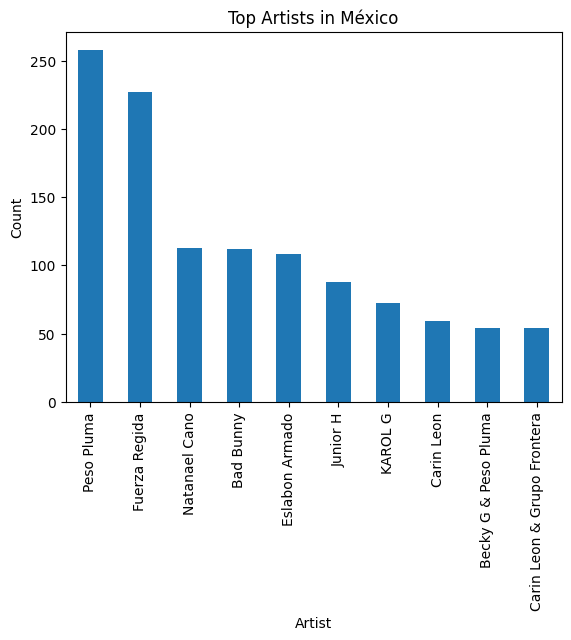

Top artists in Japan:
artist
Mrs. GREEN APPLE         295
OFFICIAL HIGE DANDISM    231
YOASOBI                  162
Yuuri                    162
Kenshi Yonezu            121
NewJeans                 110
Macaroni Empitsu         108
Vaundy                   108
back number              108
natori                   108
Name: artist, dtype: int64



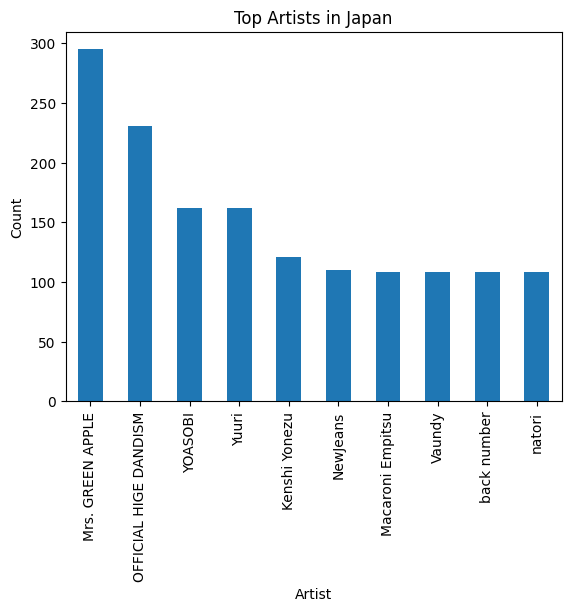

Top artists in France:
artist
Ninho             262
Werenoi           214
Jul               169
PLK               110
SDM               108
Zola               83
Gazo               79
Naps               65
Djadja & Dinaz     60
SCH                60
Name: artist, dtype: int64



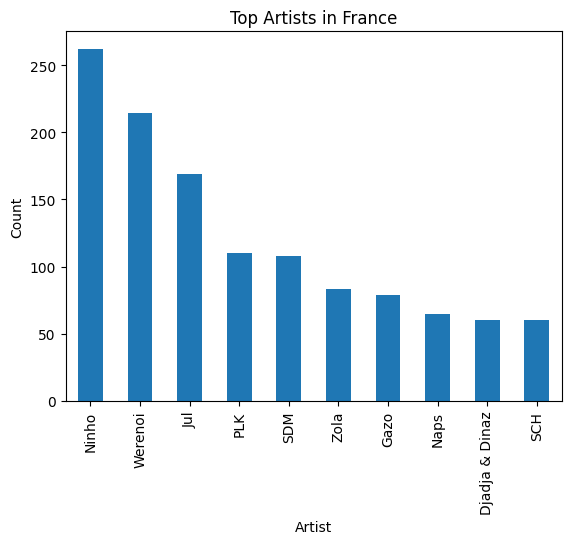

Top artists in South Korea:
artist
Jimin                                          417
Lim Young Woong                                378
NewJeans                                       218
IVE                                            162
LE SSERAFIM                                    148
aespa                                          110
FIFTY FIFTY                                    102
Fast & Furious: The Fast Saga & Jimin & BTS     93
Charlie Puth                                    90
(G)I-DLE                                        79
Name: artist, dtype: int64



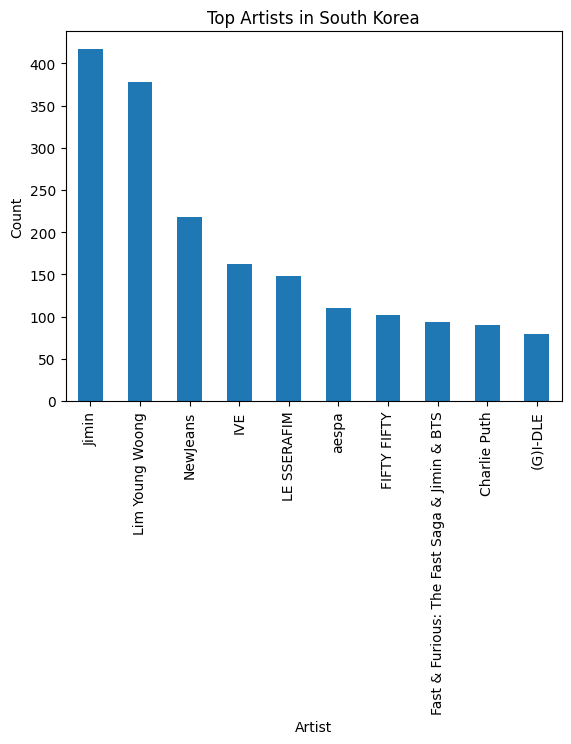

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Country' and count the occurrences of each artist
top_artists_per_country = top50_music.groupby('Country')['artist'].value_counts()

# Iterate over each country and display the top artists
for country in top50_music['Country'].unique():
    top_artists = top_artists_per_country[country].nlargest(10)  # Get top 10 artists for the country
    print(f"Top artists in {country}:")
    print(top_artists)
    print()

    # Create a bar plot for the top artists of the country
    top_artists.plot(kind='bar', xlabel='Artist', ylabel='Count', title=f"Top Artists in {country}")
    plt.show()


Top songs in Italy:
song
CENERE                                        54
CHIAGNE (feat. Lazza & Takagi & Ketra)        54
COME VUOI                                     54
Ci pensiamo domani                            54
Gelosa (feat. Shiva, Sfera Ebbasta, Guè)      54
Guasto D'Amore                                54
IL MALE CHE MI FAI (feat. Marracash)          54
MIRAGE (feat. Ozuna, GIMS & Sfera Ebbasta)    54
Mon Amour                                     54
Non litighiamo più                            54
Name: song, dtype: int64



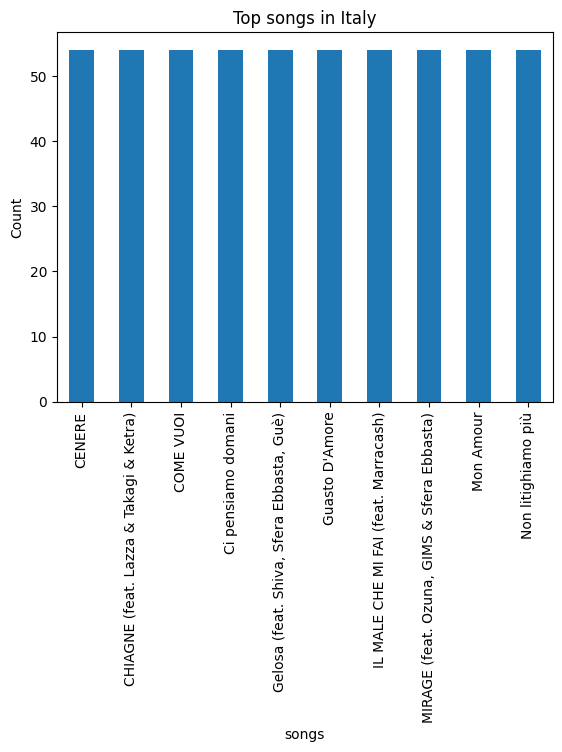

Top songs in Argentina:
song
ADIÓS                             54
AL BORDE                          54
Classy 101                        54
Costumbres - Vivo                 54
Cupido                            54
DISCOTEKA (feat. Locura Mix)      54
Ella Baila Sola                   54
En La Intimidad | CROSSOVER #1    54
Jagger.mp3                        54
La Bebe - Remix                   54
Name: song, dtype: int64



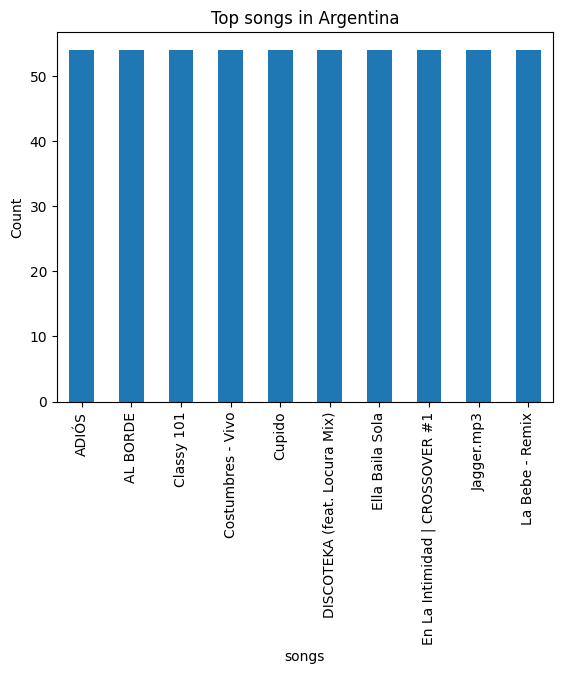

Top songs in México:
song
Rosa Pastel               73
AMG                       54
Abcdario                  54
Así Lo Quiso Dios         54
Ch y la Pizza             54
Chanel                    54
Classy 101                54
El Azul                   54
El Gordo Trae El Mando    54
El Tsurito                54
Name: song, dtype: int64



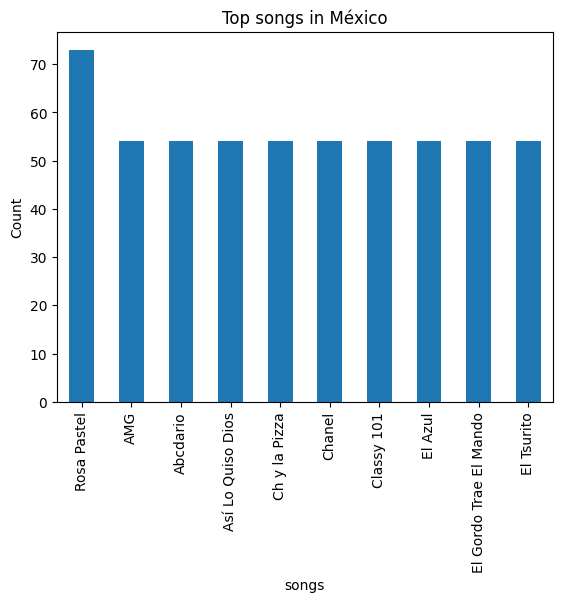

Top songs in Japan:
song
115万キロのフィルム                        54
Ditto                              54
I AM                               54
KICK BACK                          54
LADY                               54
OMG                                54
Overdose                           54
Soranji                            54
Subtitle                           54
UNFORGIVEN (feat. Nile Rodgers)    54
Name: song, dtype: int64



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19975 (\N{CJK UNIFIED IDEOGRAPH-4E07}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12461 (\N{KATAKANA LETTER KI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

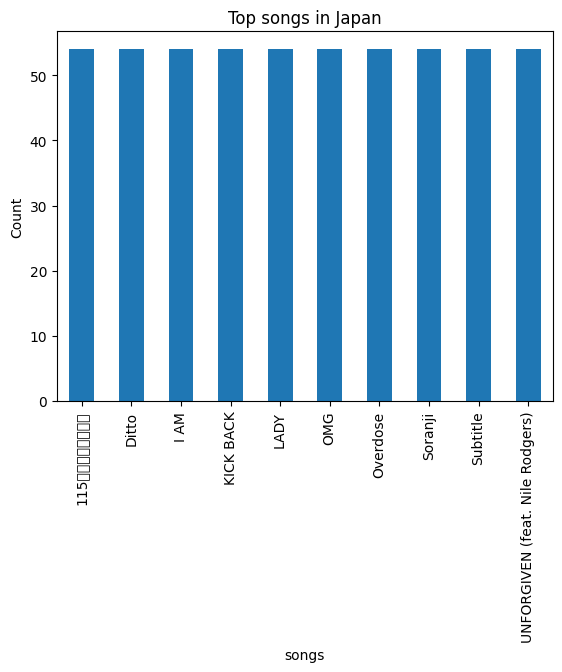

Top songs in France:
song
Baby Don't Hurt Me     54
Bolide allemand        54
C'est carré le S       54
Capitaine              54
Ciao                   54
Daylight               54
Demain                 54
Dépassé                54
Flowers                54
Jolie (feat. Ninho)    54
Name: song, dtype: int64



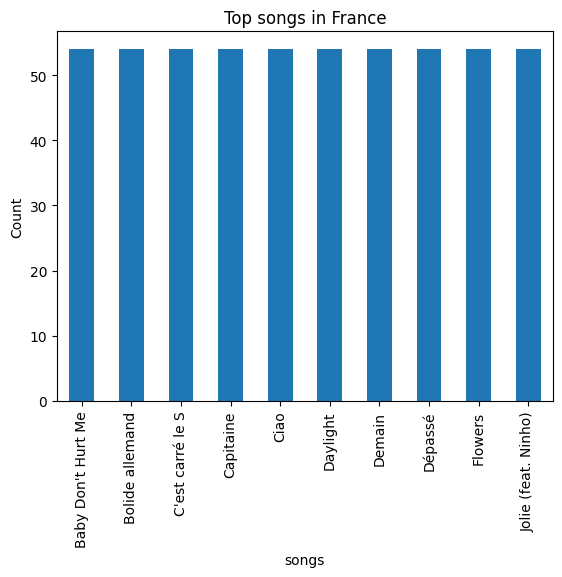

Top songs in South Korea:
song
Alone                                                                      54
Ditto                                                                      54
Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack]    54
Face-off                                                                   54
Hype Boy                                                                   54
I AM                                                                       54
If We Ever Meet Again                                                      54
Kitsch                                                                     54
Left and Right (Feat. Jung Kook of BTS)                                    54
Like Crazy                                                                 54
Name: song, dtype: int64



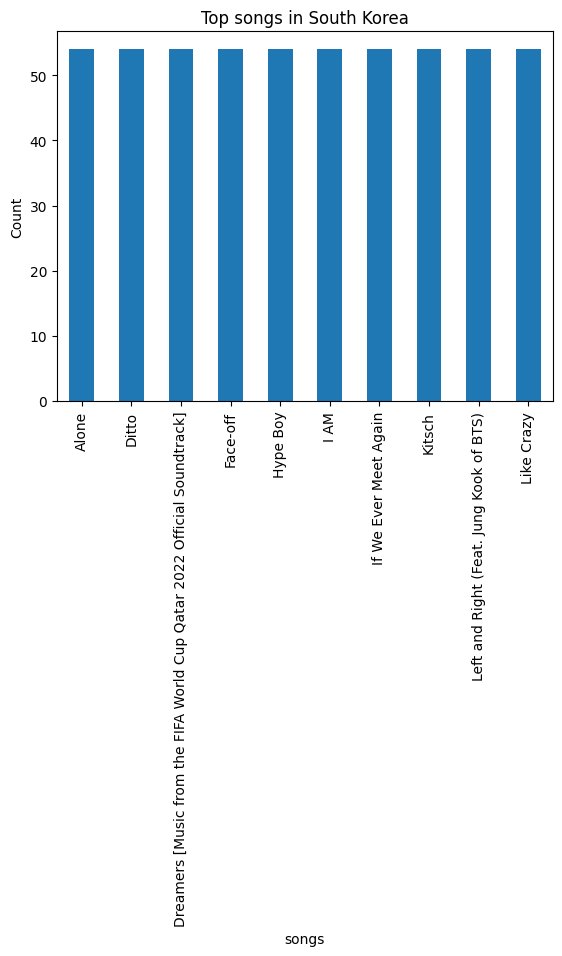

In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'Country' and count the occurrences of each artist
top_songs_per_country = top50_music.groupby('Country')['song'].value_counts()

# Iterate over each country and display the top artists
for country in top50_music['Country'].unique():
    top_songs = top_songs_per_country[country].nlargest(10)  # Get top 5 artists for the country
    print(f"Top songs in {country}:")
    print(top_songs)
    print()

    # Create a bar plot for the top artists of the country
    top_songs.plot(kind='bar', xlabel='songs', ylabel='Count', title=f"Top songs in {country}")
    plt.show()

## Top songs per artist

# Get the lyrics of the top 10 songs per Country

Scraping the lyrics

In [ ]:
import sys

import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

# Search and manipulate strings
import re

import os

In [ ]:
api_key = '9d28fa03e22a50366a910a93941a07a0'

In [ ]:
import requests

def get_lyrics(artist, song, api_key):
    base_url = "https://api.musixmatch.com/ws/1.1"
    endpoint = "/matcher.lyrics.get"

    # Format the artist and song for the API query
    query_artist = artist.lower().replace(" ", "%20")
    query_song = song.lower().replace(" ", "%20")

    # Construct the API request URL
    url = f"{base_url}{endpoint}?q_artist={query_artist}&q_track={query_song}&apikey={api_key}"

    # Send a GET request to the Musixmatch API
    response = requests.get(url)

    # Parse the JSON response
    data = response.json()

    if "message" in data and "body" in data["message"] and "lyrics" in data["message"]["body"]:
        lyrics_data = data["message"]["body"]["lyrics"]

        # Check if lyrics are available
        if "lyrics_body" in lyrics_data:
            lyrics = lyrics_data["lyrics_body"]
            # Remove explicit content warning
            lyrics = lyrics.replace("******* This Lyrics is NOT for Commercial use *******", "")
            return lyrics.strip()
        else:
            return "Lyrics not found."
    else:
        return "Lyrics not found."

# Example usage with the "top_songs_selected" dataframe
for index, row in top_songs_selected.iterrows():
    artist = row["artist"]
    song = row["song"]
    lyrics = get_lyrics(artist, song, api_key)
    print(f"Artist: {artist}")
    print(f"Song: {song}")
    print(f"Lyrics:\n{lyrics}")
    print()


Artist: Big One & FMK & Ke Personajes
Song: Un Finde | CROSSOVER #2
Lyrics:
Lyrics not found.

Artist: Yng Lvcas & Peso Pluma
Song: La Bebe - Remix
Lyrics:
Desafánate, loca, luego empápate
De mi cuerpo, mójate, usted sabe, en el Benz móntate (móntate)
¿Qué lo qué?, mi bebé en el Mercedes Benz
Las estrellas en el techo, ya estelar se fue
Pero sabes tú que esta noche estás pa' mí
Ven, trépate encima 'e mí, manda la ubi', paso por ti

Quiere que le ponga música
Pa' que baile hasta abajo la bebé
Bebimos par de botellas
Y aun así recuerda que lo hicimo' ayer (uy)

Quiere que le ponga música
Pa' que baile hasta abajo la bebé
Bebimos par de botellas
Y aun así recuerda que lo hicimo' ayer

No se le ha olvidado cómo la pasamos
Fuimos a la disco y los dos bailamos pegados
Como perros pegados, besos y un par de tragos
Se quedó a mi lado y dijo: "creo me he enamorado"

Ella fuma, ella toma
Es diablita, chiquita, pero picosa
Me encanta cuando el pantalón me lo roza
A ella le encanta, se ve en su ca

## Creating lyrics df

In [ ]:
top_songs_selected

,song,artist,Country
0,Un Finde | CROSSOVER #2,Big One & FMK & Ke Personajes,Argentina
1,La Bebe - Remix,Yng Lvcas & Peso Pluma,Argentina
2,M.A - Remix,BM & Callejero Fino & La Joaqui,Argentina
3,Classy 101,Feid & Young Miko,Argentina
4,un x100to,Grupo Frontera & Bad Bunny,Argentina
...,...,...,...
3004,"Angel Pt. 2 (feat. Jimin of BTS, Charlie Puth ...",Fast & Furious: The Fast Saga & Jimin & BTS,South Korea
3157,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,South Korea
3187,Still With You,Jung Kook,South Korea
3223,Super Shy,NewJeans,South Korea


In [ ]:
# Iterate over each row in the dataframe and fetch lyrics for each song
for index, row in top_songs_selected.iterrows():
    artist = row["artist"]
    song = row["song"]
    country = row["Country"]
    lyrics = get_lyrics(artist, song, api_key)
    top_songs_selected.at[index, "lyrics"] = lyrics

<ipython-input-51-7b96c6cf3fd6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_songs_selected.at[index, "lyrics"] = lyrics


In [ ]:
top_songs_selected

,song,artist,Country,lyrics
0,Un Finde | CROSSOVER #2,Big One & FMK & Ke Personajes,Argentina,Lyrics not found.
1,La Bebe - Remix,Yng Lvcas & Peso Pluma,Argentina,"Desafánate, loca, luego empápate\nDe mi cuerpo..."
2,M.A - Remix,BM & Callejero Fino & La Joaqui,Argentina,"Hola, mi amor\nLoquita, yo te canto así, escuc..."
3,Classy 101,Feid & Young Miko,Argentina,To los día' te imagino\nCómo te debe' ver sin ...
4,un x100to,Grupo Frontera & Bad Bunny,Argentina,Me queda 1%\nY lo usaré solo para decirte lo m...
...,...,...,...,...
3004,"Angel Pt. 2 (feat. Jimin of BTS, Charlie Puth ...",Fast & Furious: The Fast Saga & Jimin & BTS,South Korea,"Angel, don't fly so close to me\nI'll pull you..."
3157,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,South Korea,Memories follow me left and right\nI can feel ...
3187,Still With You,Jung Kook,South Korea,날 스치는 그대의 옅은 그 목소리\n내 이름을 한 번만 더 불러주세요\n얼어버린 노...
3223,Super Shy,NewJeans,South Korea,"I'm super shy, super shy\nBut wait a minute wh..."


# Cleaning my new dataframe

In [ ]:
top_songs_selected = top_songs_selected.drop(top_songs_selected[top_songs_selected["lyrics"] == "Lyrics not found."].index)
top_songs_selected

,song,artist,Country,lyrics
1,La Bebe - Remix,Yng Lvcas & Peso Pluma,Argentina,"Desafánate, loca, luego empápate\nDe mi cuerpo..."
2,M.A - Remix,BM & Callejero Fino & La Joaqui,Argentina,"Hola, mi amor\nLoquita, yo te canto así, escuc..."
3,Classy 101,Feid & Young Miko,Argentina,To los día' te imagino\nCómo te debe' ver sin ...
4,un x100to,Grupo Frontera & Bad Bunny,Argentina,Me queda 1%\nY lo usaré solo para decirte lo m...
5,Pobre Corazón - En Vivo,Ke Personajes & Onda Sabanera,Argentina,"Hacemo' otra, ¿la queré' arrancar?\nSí, mandal..."
...,...,...,...,...
3004,"Angel Pt. 2 (feat. Jimin of BTS, Charlie Puth ...",Fast & Furious: The Fast Saga & Jimin & BTS,South Korea,"Angel, don't fly so close to me\nI'll pull you..."
3157,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,South Korea,Memories follow me left and right\nI can feel ...
3187,Still With You,Jung Kook,South Korea,날 스치는 그대의 옅은 그 목소리\n내 이름을 한 번만 더 불러주세요\n얼어버린 노...
3223,Super Shy,NewJeans,South Korea,"I'm super shy, super shy\nBut wait a minute wh..."


In [ ]:
# clean data
missing_percentages = top_songs_selected .isna().sum().sort_values(ascending=False)/len(top_songs_selected )
missing_percentages

song       0.0
artist     0.0
Country    0.0
lyrics     0.0
dtype: float64

In [ ]:
# Revisar si hay canciones repetidas.. pero no las quitaremos porque es por ser top 10 en más de 1 país
repeated_songs = top_songs_selected.song.value_counts()
repeated_songs


La Bebe - Remix                               2
LALA                                          2
un x100to                                     2
Ella Baila Sola                               2
Tattoo                                        2
                                             ..
Un Briciolo Di Allegria (con MINA)            1
COME VUOI                                     1
Mon Amour                                     1
MIRAGE (feat. Ozuna, GIMS & Sfera Ebbasta)    1
New Jeans                                     1
Name: song, Length: 156, dtype: int64

#NLP Processing

Remove punctuations

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

def remove_punctuations(text):
    for char in string.punctuation:
        text = str(text).replace(char, ' ')
    return text


In [ ]:
top_songs_selected["lyrics"] = top_songs_selected["lyrics"].apply(remove_punctuations)
top_songs_selected["song"] = top_songs_selected["song"].apply(remove_punctuations)

All text in lower

In [ ]:
top_songs_selected["lyrics"] = top_songs_selected["lyrics"].str.lower()
top_songs_selected["song"] = top_songs_selected["song"].str.lower()

Remove numbers

In [ ]:
def remove_numbers(text):
    words_only = "".join(filter(lambda x: not x.isdigit(), str(text)))
    return words_only

In [ ]:
top_songs_selected["lyrics"] = top_songs_selected["lyrics"].apply(remove_numbers)
top_songs_selected["song"] = top_songs_selected["song"].apply(remove_numbers)

Stopwords


In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('stopwords', quiet=True, raise_on_error=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

#stopwords in korean since they are not included in the stopwords package
custom_stopwords_korean = [
    "은", "는", "이", "가", "을", "를", "에", "의", "과", "와", "으로", "로", "에서", "이나", "까지",
    "하다", "되다", "있다", "없다", "이다", "그", "저", "이러한", "같은", "그런", "한", "모든", "많은",
    "아무", "어떤", "몇", "약간", "조금", "많이", "더", "덜", "정말", "너무", "매우", "대부분", "가장",
    "때문에", "이유로", "함께", "같이", "그래서", "그러나", "하지만", "그리고", "또는", "아니면"
]

# Combine all stop words from the three languages
stop_words = set(stopwords.words('english')).union(stopwords.words('spanish')).union(stopwords.words('french')).union(stopwords.words('italian')).union(custom_stopwords_korean)

# Create function
def remove_stopwords (text):
    tokenized = word_tokenize(str(text))
    without_stopwords = [word for word in tokenized if not word in stop_words]
    return without_stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
top_songs_selected["lyrics"] = top_songs_selected["lyrics"].apply(remove_stopwords)
top_songs_selected["song"] = top_songs_selected["song"].apply(remove_stopwords)

Lemmatizer

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [ ]:
import nltk

# set the directory path where you want to store the WordNet data
nltk_data_dir = "['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']"

# add the directory path to the NLTK data path list
nltk.data.path.append(nltk_data_dir)

# download and install the WordNet data in the specified directory
nltk.download("wordnet", download_dir=nltk_data_dir)

[nltk_data] Downloading package wordnet to ['/root/nltk_data',
[nltk_data]     '/usr/nltk_data', '/usr/share/nltk_data',
[nltk_data]     '/usr/lib/nltk_data', '/usr/share/nltk_data',
[nltk_data]     '/usr/local/share/nltk_data', '/usr/lib/nltk_data',
[nltk_data]     '/usr/local/lib/nltk_data']...


True

In [ ]:
import nltk
nltk.data.path.append(nltk_data_dir )

In [ ]:
import nltk
nltk.data.path.append(nltk_data_dir)
from nltk.corpus import wordnet as wn
wn.synsets('hello')

[Synset('hello.n.01')]

In [ ]:
from nltk.stem import WordNetLemmatizer

def lemma(text):
    lemmatizer = WordNetLemmatizer() # Instantiate lemmatizer
    lemmatized = [lemmatizer.lemmatize(word) for word in text] # Lemmatize
    lemmatized_string = " ".join(lemmatized)
    return lemmatized_string

top_songs_selected["lyrics"] = top_songs_selected["lyrics"].apply(lemma)
top_songs_selected["song"] = top_songs_selected["song"].apply(lemma)

In [ ]:
top_songs_selected

,song,artist,Country,lyrics
1,bebe remix,Yng Lvcas & Peso Pluma,Argentina,desafánate loca luego empápate cuerpo mójate u...
2,remix,BM & Callejero Fino & La Joaqui,Argentina,hola amor loquita canto así escuchá mami noche...
3,classy,Feid & Young Miko,Argentina,día imagino cómo debe ver valentino cuerpo ase...
4,xto,Grupo Frontera & Bad Bunny,Argentina,queda usaré solo decirte siento ven disco solo...
5,pobre corazón vivo,Ke Personajes & Onda Sabanera,Argentina,hacemo ¿la queré arrancar mandale cucha siempr...
...,...,...,...,...
3004,angel pt feat jimin bts charlie puth muni long,Fast & Furious: The Fast Saga & Jimin & BTS,South Korea,angel fly close pull eventually want lose wing...
3157,left right feat jung kook bts,Charlie Puth,South Korea,memory follow left right feel feel take every ...
3187,still,Jung Kook,South Korea,날 스치는 그대의 옅은 목소리 내 이름을 번만 불러주세요 얼어버린 노을 아래 멈춰 ...
3223,super shy,NewJeans,South Korea,super shy super shy wait minute make mine make...


Sentiment Analysis

In [ ]:
import numpy as np

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

sentiment_list = []
sentiment_score_list = []

for lyrics in top_songs_selected['lyrics']:
    try:
        sentiment_score = analyser.polarity_scores(lyrics)
        if sentiment_score['compound'] >= 0.05:
            sentiment_percentage = sentiment_score['compound']
            sentiment = 'Positive'
        elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
            sentiment_percentage = sentiment_score['compound']
            sentiment = 'Neutral'
        elif sentiment_score['compound'] <= -0.05:
            sentiment_percentage = sentiment_score['compound']
            sentiment = 'Negative'

        sentiment_list.append(sentiment)
        sentiment_score_list.append(abs(sentiment_percentage) * 100)
    except:
        sentiment_list.append('None')
        sentiment_score_list.append(0)

top_songs_selected['Sentiment'] = sentiment_list
top_songs_selected['Sentiment_Score'] = sentiment_score_list

In [ ]:
top_songs_selected

,song,artist,Country,lyrics,Sentiment,Sentiment_Score
1,bebe remix,Yng Lvcas & Peso Pluma,Argentina,desafánate loca luego empápate cuerpo mójate u...,Neutral,0.00
2,remix,BM & Callejero Fino & La Joaqui,Argentina,hola amor loquita canto así escuchá mami noche...,Positive,87.79
3,classy,Feid & Young Miko,Argentina,día imagino cómo debe ver valentino cuerpo ase...,Negative,10.27
4,xto,Grupo Frontera & Bad Bunny,Argentina,queda usaré solo decirte siento ven disco solo...,Positive,75.79
5,pobre corazón vivo,Ke Personajes & Onda Sabanera,Argentina,hacemo ¿la queré arrancar mandale cucha siempr...,Positive,40.19
...,...,...,...,...,...,...
3004,angel pt feat jimin bts charlie puth muni long,Fast & Furious: The Fast Saga & Jimin & BTS,South Korea,angel fly close pull eventually want lose wing...,Positive,87.50
3157,left right feat jung kook bts,Charlie Puth,South Korea,memory follow left right feel feel take every ...,Positive,5.16
3187,still,Jung Kook,South Korea,날 스치는 그대의 옅은 목소리 내 이름을 번만 불러주세요 얼어버린 노을 아래 멈춰 ...,Neutral,0.00
3223,super shy,NewJeans,South Korea,super shy super shy wait minute make mine make...,Positive,97.86


Top 10: best and worst
```



In [ ]:
# Calculate sentiment scores for each song
top_songs_selected['Sentiment_Score'] = top_songs_selected['lyrics'].apply(lambda lyrics: analyser.polarity_scores(lyrics)['compound'])

# Sort the DataFrame by sentiment score in descending order
top_songs_selected.sort_values(by='Sentiment_Score', ascending=False, inplace=True)

# Top 10 songs with the best sentiment scores
top_10_best = top_songs_selected.head(10)

# Top 10 songs with the worst sentiment scores
top_10_worst = top_songs_selected.tail(10)

# Display the top 10 songs with the best sentiment scores
print("Top 10 songs with the best sentiment scores:")
print(top_10_best[['song', 'artist', 'Country', 'Sentiment_Score']])

# Display the top 10 songs with the worst sentiment scores
print("\nTop 10 songs with the worst sentiment scores:")
print(top_10_worst[['song', 'artist', 'Country', 'Sentiment_Score']])


Top 10 songs with the best sentiment scores:
                    song                           artist      Country  \
548               flower                      Miley Cyrus       France   
1059                 gtb           JEY BROWNIE & FLEM KGB       France   
3223           super shy                         NewJeans  South Korea   
1188  restare feat lazza                        Baby Gang        Italy   
2706         set free pt                            Jimin  South Korea   
1081              cenere                            Lazza        Italy   
2704           queencard                         (G)I-DLE  South Korea   
2708              kitsch                              IVE  South Korea   
1067              tattoo                           Loreen       France   
2                  remix  BM & Callejero Fino & La Joaqui    Argentina   

      Sentiment_Score  
548            0.9913  
1059           0.9872  
3223           0.9786  
1188           0.9709  
2706           0.970

# Top 3 most Happy Songs!!

In [ ]:
mexico_songs = top_songs_selected[(top_songs_selected['Country'] == 'México') & (top_songs_selected['Sentiment'] == 'Positive')]
mexico_songs = mexico_songs.sort_values('Sentiment_Score', ascending=False).head(3)

# Print the three most happy songs from Mexico
print(mexico_songs[['song', 'artist', 'lyrics', 'Sentiment_Score']])


           song                      artist  \
2161        xto  Grupo Frontera & Bad Bunny   
2176  acróstico                     Shakira   
2318        bye                  Peso Pluma   

                                                 lyrics  Sentiment_Score  
2161  queda usaré solo decirte siento ven disco solo...           0.7579  
2176  enseñaste amor estafa real acaba intenté veas ...           0.6124  
2318  ¿qué tal vez noche costumbre amanecerá sigo pe...           0.6124  


In [ ]:
import pandas as pd

# Define the countries and sentiment category
countries = ['México', 'South Korea', 'Italy', 'France', 'Argentina']
sentiment_category = 'Positive'

# Iterate over each country
for country in countries:
    # Filter the DataFrame for the specified country and sentiment category
    country_songs = top_songs_selected[(top_songs_selected['Country'] == country) & (top_songs_selected['Sentiment'] == sentiment_category)]

    # Sort the songs by sentiment score in descending order and select the top 3
    top_3_songs = country_songs.sort_values('Sentiment_Score', ascending=False).head(3)

    # Print the top 3 positive songs for the country
    if not top_3_songs.empty:  # Check if there are songs to display
        print(f"Top 3 positive songs from {country}:")
        print(top_3_songs[['song', 'artist', 'lyrics', 'Sentiment_Score']])
        print()



Top 3 positive songs from México:
           song                      artist  \
2161        xto  Grupo Frontera & Bad Bunny   
2176  acróstico                     Shakira   
2318        bye                  Peso Pluma   

                                                 lyrics  Sentiment_Score  
2161  queda usaré solo decirte siento ven disco solo...           0.7579  
2176  enseñaste amor estafa real acaba intenté veas ...           0.6124  
2318  ¿qué tal vez noche costumbre amanecerá sigo pe...           0.6124  

Top 3 positive songs from South Korea:
             song    artist  \
3223    super shy  NewJeans   
2706  set free pt     Jimin   
2704    queencard  (G)I-DLE   

                                                 lyrics  Sentiment_Score  
3223  super shy super shy wait minute make mine make...           0.9786  
2706  ay got good time yeah time get mine 헤맸어 미로 hen...           0.9701  
2704  hey 뭘 보니 내가 좀 sexy sexy 반했니 yeah 뭐 하니 너도 내 kis...           0.9274  

Top 3 posit

#Sentyment distribution

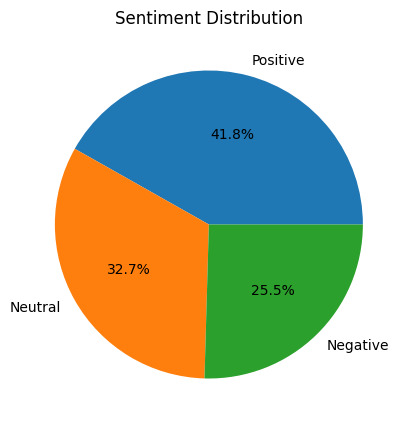

In [ ]:
sentiment_counts = top_songs_selected['Sentiment'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()


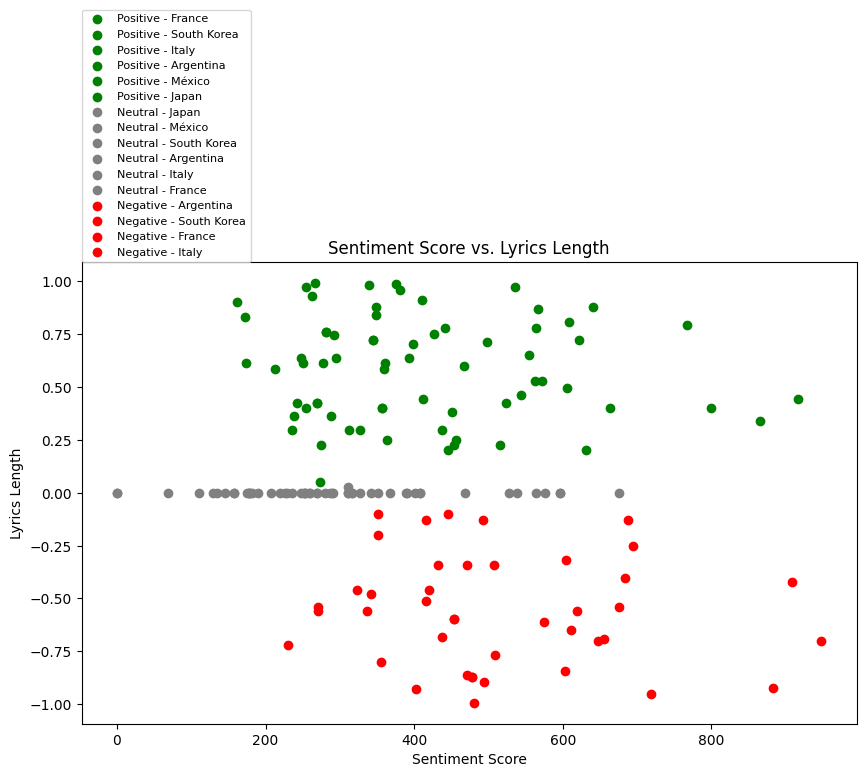

In [ ]:
import matplotlib.pyplot as plt

# Define colors for each sentiment category
color_mapping = {'Positive': 'green', 'Neutral': 'grey', 'Negative': 'red'}

plt.figure(figsize=(10, 6))
for sentiment, color in color_mapping.items():
    sentiment_df = top_songs_selected[top_songs_selected['Sentiment'] == sentiment]
    for country in sentiment_df['Country'].unique():
        country_df = sentiment_df[sentiment_df['Country'] == country]
        plt.scatter(country_df['lyrics'].apply(len), country_df['Sentiment_Score'], c=color, label=sentiment + ' - ' + country)

plt.xlabel('Sentiment Score')
plt.ylabel('Lyrics Length')
plt.title('Sentiment Score vs. Lyrics Length')

# Adjust the legend box
legend = plt.legend(prop={'size': 8}, loc='lower left', bbox_to_anchor=(0, 1), borderaxespad=0.)

plt.show()



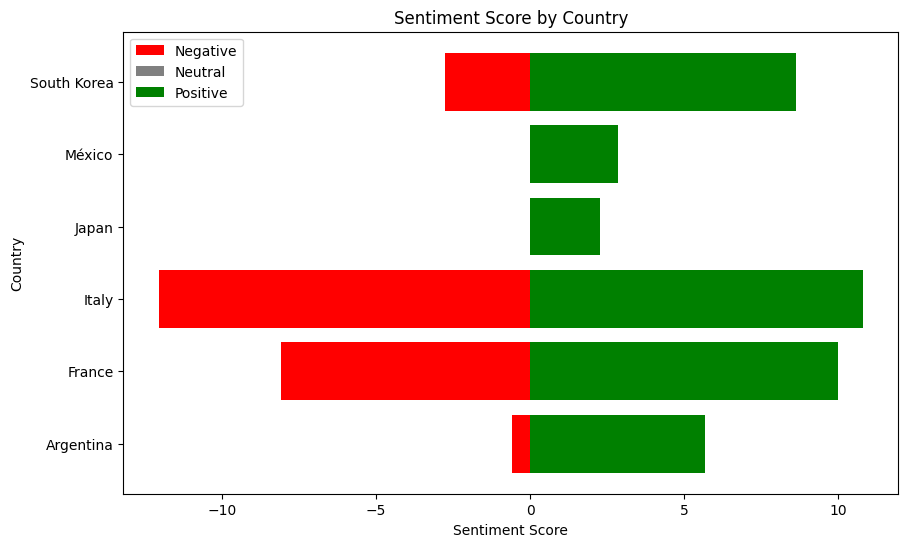

In [ ]:
import matplotlib.pyplot as plt

# Group the dataframe by country and calculate the sum of sentiment scores for each sentiment category
sentiment_sums = top_songs_selected.groupby(['Country', 'Sentiment'])['Sentiment_Score'].sum().unstack()

# Get the countries and sentiment categories
countries = sentiment_sums.index.tolist()
sentiment_categories = sentiment_sums.columns.tolist()

# Define the colors for each sentiment category
colors = {'Positive': 'green', 'Neutral': 'grey', 'Negative': 'red'}

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, sentiment_category in enumerate(sentiment_categories):
    sentiment_scores = sentiment_sums[sentiment_category]
    ax.barh(countries, sentiment_scores, label=sentiment_category, color=colors[sentiment_category])

ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Country')
ax.set_title('Sentiment Score by Country')
ax.legend()

plt.show()
